In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Prepare the data

In [2]:
# import data
path = 'myopia.csv'
df = pd.read_csv(path)
df.tail()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0
617,6,0.802,22.260000,3.530,3.484,15.25,25,0,2,0,10,14,1,1,0


In [15]:
# assign data to variables
data = df.drop('MYOPIC', axis = 1)

In [4]:
# scale data using StandardScaler()
data_scaled = StandardScaler().fit_transform(data)
data_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

# Apply Dimensionality Reduction

In [5]:
# initialize PCA model
pca = PCA(n_components=0.9)

# get two principal components
data_pca = pca.fit_transform(data_scaled)

# transform PCA data to a DataFrame
data_transformed = pd.DataFrame(data = data_pca)

data_transformed.tail()

,0,1,2,3,4,5,6,7,8,9
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581
617,-0.691534,-0.737046,-1.052900,-0.502772,-0.882590,-0.231183,-1.447594,-0.273804,0.946161,0.495797


In [6]:
# print explained variance
pca.explained_variance_

array([2.96963488, 2.19591352, 1.21829455, 1.16413033, 1.0636011 ,
       0.9812908 , 0.90965003, 0.89434022, 0.75633707, 0.72996042])

In [7]:
# initialize t-SNE model
tsne = TSNE(learning_rate=50)

# reduce dimensions
tsne_features = tsne.fit_transform(data_transformed)

# print dimensions
tsne_features.shape

C:\Users\parkm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [8]:
# prepare to plot the dataset

# the first column of transformed features
x = tsne_features[:,0]

# the second column of transformed features
y = tsne_features[:,1]

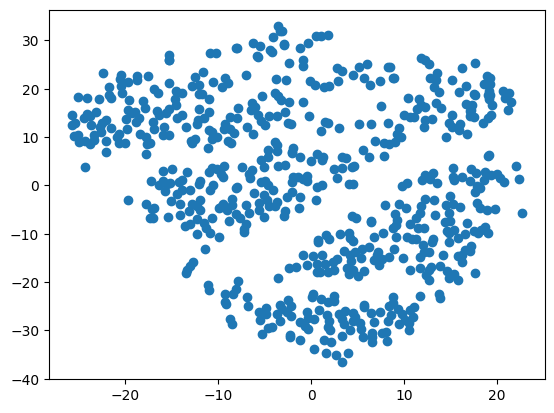

In [9]:
# plot data
plt.scatter(x, y)
plt.show()

# Perform a Cluster Analysis with K-means

In [10]:
# identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1,10))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(data_transformed)
    inertia.append(km.inertia_)
    
# create the elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.tail()

,k,inertia
4,5,5378.339066
5,6,5148.000736
6,7,4932.930874
7,8,4753.394264
8,9,4594.712377


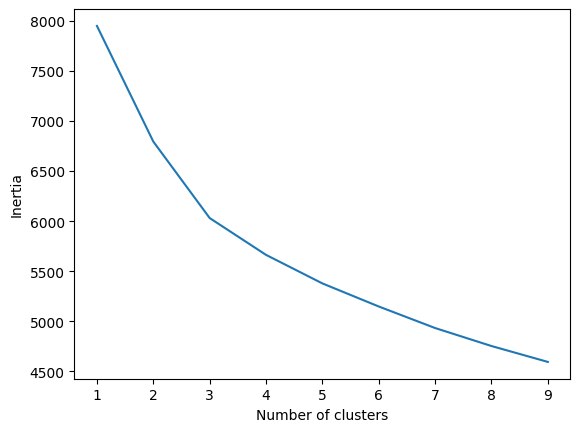

In [11]:
# plot the elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendation

Based on the K-Means elbow curve there are three clusters the patients can be grouped into. This finding is also supported by the clustering visible in the scatter plot of the t-SNE output showing three diagonal bands.